In [1]:
import warnings
warnings.filterwarnings('ignore')  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

# Rain

In [2]:
### Importing rain data
rain1=pd.read_excel('F:\Research_related\Dataset\Dataset\Rain.xlsx',
                 header=7)
### dropping stati columns and here column name and index must match
rain2=rain1.drop(['Stati'],axis=1)
### Restracturing dataset
rain3 = pd.melt(rain2, id_vars=["Year","Month"],
             var_name='Day',value_name="Rain")
rain3.dropna(subset = ["Rain"], inplace=True)  ### Its drop all the nun value
### sorting data set
rain=rain3.sort_values(by =['Year','Month','Day'])
rain

,Year,Month,Day,Rain
0,1988,1,1,0.0
360,1988,1,2,0.0
720,1988,1,3,0.0
1080,1988,1,4,0.0
1440,1988,1,5,0.0
...,...,...,...,...
9719,2017,12,27,0.0
10079,2017,12,28,0.0
10439,2017,12,29,0.0
10799,2017,12,30,0.0


# Cloud

In [3]:
### Importing cloud setting header row  skipping useless rows
cloud1=pd.read_excel('F:\Research_related\Dataset\Dataset\cloud.xlsx',
                     header=8)

In [4]:
### dropping Index columns and here column name and index number must match
cloud2=cloud1.drop(['Index'],axis=1)

In [5]:
### Restracturing dataset
cloud3 = pd.melt(cloud2, id_vars=["Year","Mo"],
             var_name='Day',value_name="Cloud")
cloud3.dropna(subset = ["Cloud"], inplace=True)  ### Its drop all the nun value

In [6]:
### sorting data set
cloud4=cloud3.sort_values(by =['Year','Mo','Day'])
cloud=cloud4.rename(columns={"Mo":"Month"})
round(100*(cloud.isin(['***']).any()/len(cloud.index)),2)

Year     0.00
Month    0.00
Day      0.00
Cloud    0.01
dtype: float64

# Releted Humadity

In [7]:
### Importing Releted Humadity setting header row and index column and skipping useless rows
rh1=pd.read_excel('F:\Research_related\Dataset\Dataset\RH.xlsx',
                     header=3,skipfooter=1,usecols=range(34))

In [8]:
### dropping Station name columns and here column name and index number must match
rh2=rh1.drop(['Station name'],axis=1)

In [9]:
### Restracturing dataset
rh3 = pd.melt(rh2, id_vars=["Year","Month"],
             var_name='Day',value_name="Releted Hum.")
rh3.dropna(subset = ["Releted Hum."], inplace=True)  ### Its drop all the nun value

In [10]:
### sorting data set
rh=rh3.sort_values(by =['Year','Month','Day'])

# Sea Level Pressure

In [11]:
### Importing Sea level pressure setting header row  skipping useless rows
slp1=pd.read_excel('F:\Research_related\Dataset\Dataset\SLP.xlsx',
                     header=8)

In [12]:
### dropping Index columns and here column name and index number must match
slp2=slp1.drop(['Index'],axis=1)

In [13]:
### Restractering dataset
slp3 = pd.melt(slp2, id_vars=["Year","Month"],
             var_name='Day',value_name="Sea Level P.")
slp3.dropna(subset = ["Sea Level P."], inplace=True) ### Its drop all the nun value

In [14]:
### sorting data set
slp=slp3.sort_values(by =['Year','Month','Day'])

# Wind

In [15]:
### Importing wind setting header row skipping useless rows
wind1=pd.read_excel('F:\Research_related\Dataset\Dataset\Wind.xlsx',
                     header=9)

In [16]:
### dropping useless columns
wind2=wind1.drop(['DR','DR.1','DR.2','DR.3','DR.4','DR.5','DR.6','DR.7','DR.8',
                 'DR.9','DR.10','DR.11','DR.12','DR.13','DR.14','DR.15','DR.16',
                  'DR.17', 'DR.18','DR.19','DR.20','DR.21','DR.22','DR.23',
                  'DR.24','DR.25','DR.26','DR.27','DR.28','DR.29','DR.30'],axis=1)


In [17]:
### Renaming columns
wind3=wind2.rename(columns={'Mon': 'Month','Sp': 1,'SP': 2,'SP.1': 3,
                            'SP.2': 4,'SP.3': 5,'SP.4': 6,'SP.5': 7,
                            'SP.6': 8,'SP.7': 9,'SP.8': 10,'SP.9': 11,
                            'SP.10': 12,'SP.11': 13,'SP.12': 14,
                            'SP.13': 15,'SP.14': 16,'SP.15': 17,
                            'SP.16': 18,'SP.17': 19,'SP.18': 20,
                            'SP.19': 21,'SP.20': 22,'SP.21': 23,
                            'SP.22': 24,'SP.23': 25,'SP.24': 26,
                            'SP.25': 27,'SP.26': 28,'SP.27': 29,
                            'SP.28': 30,'SP.29': 31})

In [18]:
### Restractering dataset
wind4 = pd.melt(wind3, id_vars=["Year","Month"],
             var_name='Day',value_name="Wind")

In [19]:
wind4.dropna(subset = ["Wind"], inplace=True)  ### Its drop all the nun value

In [20]:
### Sorting dataset
wind=wind4.sort_values(by =['Year','Month'])

# Max_Temp

In [21]:
### Importing max temp. setting header row and index column and skipping useless rows
maxt1=pd.read_excel('F:\Research_related\Dataset\Dataset\MaxT.xlsx',
                     header=4,skipfooter=13,usecols=range(33))

In [22]:
### Restractering dataset
maxt2 = pd.melt(maxt1, id_vars=["Year","Mo"],
             var_name='Day',value_name="Max_T.")
maxt2.dropna(subset = ["Max_T."], inplace=True)  ### Its drop all the nun value

In [23]:
### sorting data set and changing columns name
maxt3=maxt2.sort_values(by =['Year','Mo'])
maxt=maxt3.rename(columns={"Mo":"Month"})

# Min_Temp

In [24]:
### Importing min temp. setting header row and index column and skipping useless rows
mint1=pd.read_excel('F:\Research_related\Dataset\Dataset\MinT.xlsx',
                     header=3,skipfooter=11,usecols=range(33))

In [25]:
### Restractering dataset
mint2= pd.melt(mint1, id_vars=["Year","Mo"],
             var_name='Day',value_name="Min_T.")
mint2.dropna(subset = ["Min_T."], inplace=True)  ### Its drop all the nun value

In [26]:
### sorting data set and changing columns name
mint3=mint2.sort_values(by =['Year','Mo'])
mint=mint3.rename(columns={"Mo":"Month"})

# Mergeing all data set

In [27]:
df1=pd.merge(rain,maxt)
df2=pd.merge(df1,mint)
df3=pd.merge(df2,cloud)
df4=pd.merge(df3,rh)
df5=pd.merge(df4,slp)
df6=pd.merge(df5,wind)
df6

,Year,Month,Day,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,1988,1,1,0.0,26.7,12.9,0,77.0,1016.9,0.0
1,1988,1,2,0.0,26.0,12.9,2,76.0,1016.4,0.0
2,1988,1,3,0.0,27.5,14.5,3,73.0,1014.8,2.0
3,1988,1,4,0.0,27.2,15.8,4,71.0,1015.9,5.0
4,1988,1,5,0.0,27.8,15.4,4,75.0,1016.1,3.5
...,...,...,...,...,...,...,...,...,...,...
10953,2017,12,27,0.0,27.1,16.4,0,72.0,1013.8,4.0
10954,2017,12,28,0.0,24.6,16.2,0,85.0,1013.8,2.0
10955,2017,12,29,0.0,27.0,14.8,0.0,83.0,1014.9,0.0
10956,2017,12,30,0.0,29.1,16.2,0.0,67.0,1013.7,0.0


In [28]:
df7=df6.replace(to_replace="***", method='ffill') ###it fill all "***" values with ffill
df8=df7.replace(to_replace="****", method='ffill')
df9=df8.replace(to_replace="*****", method='ffill')
df=df9.replace(to_replace="******", method='ffill')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10958 entries, 0 to 10957
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          10958 non-null  int64  
 1   Month         10958 non-null  int64  
 2   Day           10958 non-null  object 
 3   Rain          10958 non-null  float64
 4   Max_T.        10958 non-null  object 
 5   Min_T.        10958 non-null  object 
 6   Cloud         10958 non-null  object 
 7   Releted Hum.  10958 non-null  float64
 8   Sea Level P.  10958 non-null  object 
 9   Wind          10958 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 941.7+ KB


In [30]:
df=df.sort_values(by =['Month','Day','Year'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Year,Month,Day,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,1988,1,1,0.0,26.7,12.9,0,77.0,1016.9,0.0
366,1989,1,1,0.0,26.4,14.7,1,78.0,1016.7,5.0
731,1990,1,1,0.0,23.5,11.4,0,68.0,1015.1,4.4
1096,1991,1,1,0.0,25.6,15.2,3,75.0,1011.9,2.0
1461,1992,1,1,0.0,20.5,12.8,4,75.0,1019.0,2.0


In [31]:
df

,Year,Month,Day,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,1988,1,1,0.0,26.7,12.9,0,77.0,1016.9,0.0
366,1989,1,1,0.0,26.4,14.7,1,78.0,1016.7,5.0
731,1990,1,1,0.0,23.5,11.4,0,68.0,1015.1,4.4
1096,1991,1,1,0.0,25.6,15.2,3,75.0,1011.9,2.0
1461,1992,1,1,0.0,20.5,12.8,4,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...,...
9496,2013,12,31,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
9861,2014,12,31,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
10226,2015,12,31,0.0,26.4,15.5,2.0,73.0,1017.5,0.0
10592,2016,12,31,0.0,26.2,15.0,1.0,80.0,1014.6,0.0


In [32]:
import datetime
date=df.apply(lambda x: datetime.date(int(x['Year']), x['Month'], x['Day']),axis=1)
date = pd.to_datetime(date)
dfm = df.drop(columns=['Day'])
dfm.insert(0, 'Date', date)

In [33]:
dfm=dfm.set_index('Date')
dfm

,Year,Month,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,,,
1988-01-01,1988,1,0.0,26.7,12.9,0,77.0,1016.9,0.0
1989-01-01,1989,1,0.0,26.4,14.7,1,78.0,1016.7,5.0
1990-01-01,1990,1,0.0,23.5,11.4,0,68.0,1015.1,4.4
1991-01-01,1991,1,0.0,25.6,15.2,3,75.0,1011.9,2.0
1992-01-01,1992,1,0.0,20.5,12.8,4,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...
2013-12-31,2013,12,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
2014-12-31,2014,12,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
2015-12-31,2015,12,0.0,26.4,15.5,2.0,73.0,1017.5,0.0


In [34]:
dfm.dtypes

Year              int64
Month             int64
Rain            float64
Max_T.           object
Min_T.           object
Cloud            object
Releted Hum.    float64
Sea Level P.     object
Wind             object
dtype: object

In [35]:
cols = ['Max_T.','Min_T.','Cloud','Sea Level P.','Wind']
dfm[cols] = dfm[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [36]:
dfm.dtypes

Year              int64
Month             int64
Rain            float64
Max_T.          float64
Min_T.          float64
Cloud           float64
Releted Hum.    float64
Sea Level P.    float64
Wind            float64
dtype: object

In [37]:
sns.set(rc={'figure.figsize':(14,4)})
## Use seaborn style defaults and set the default figure size

<AxesSubplot:xlabel='Date'>

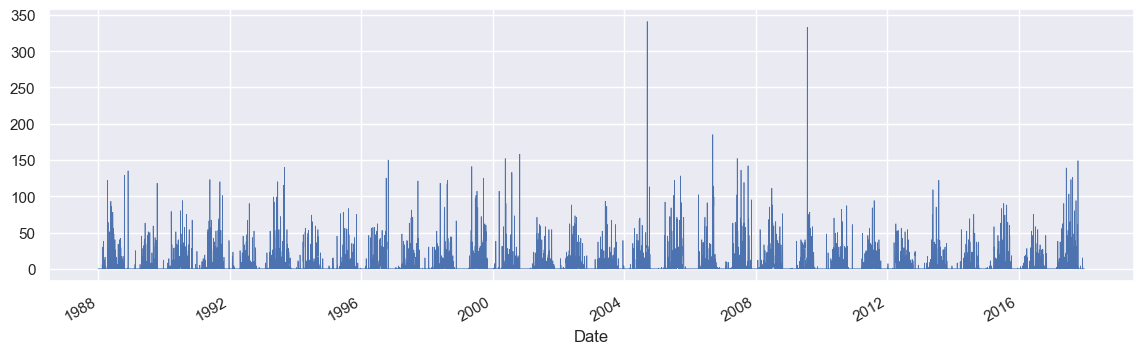

In [38]:
dfm['Rain'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

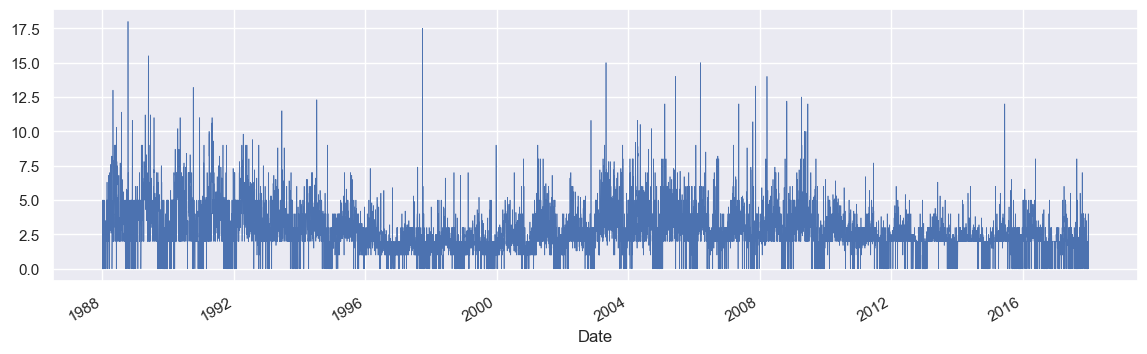

In [39]:
dfm['Wind'].plot(linewidth=0.5)

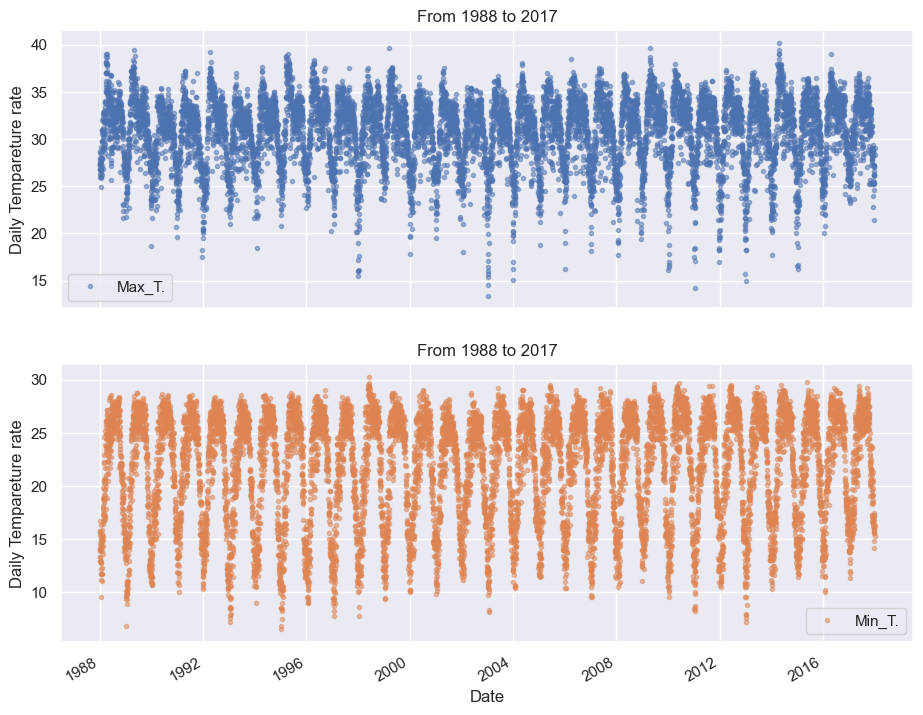

In [40]:
cols_plot = ['Max_T.','Min_T.']
axes = dfm[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',
                           figsize=(11,9),subplots=True)
for ax in axes:
    ax.set_title('From 1988 to 2017')
    ax.set_ylabel('Daily Tempareture rate')

In [41]:
dfm

,Year,Month,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,,,
1988-01-01,1988,1,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1989-01-01,1989,1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
1990-01-01,1990,1,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
1991-01-01,1991,1,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
1992-01-01,1992,1,0.0,20.5,12.8,4.0,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...
2013-12-31,2013,12,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
2014-12-31,2014,12,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
2015-12-31,2015,12,0.0,26.4,15.5,2.0,73.0,1017.5,0.0


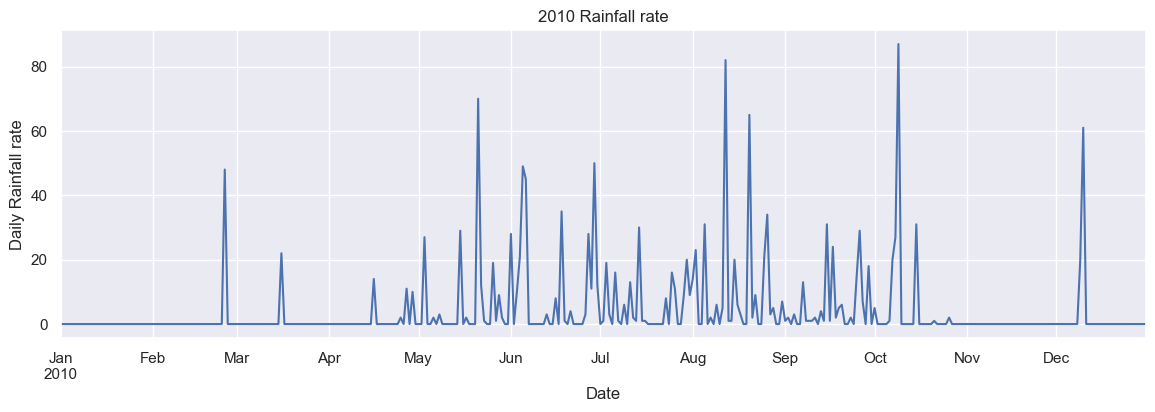

In [42]:
ax = dfm.loc['2010', 'Rain'].plot()
ax.set_title('2010 Rainfall rate')
ax.set_ylabel('Daily Rainfall rate');

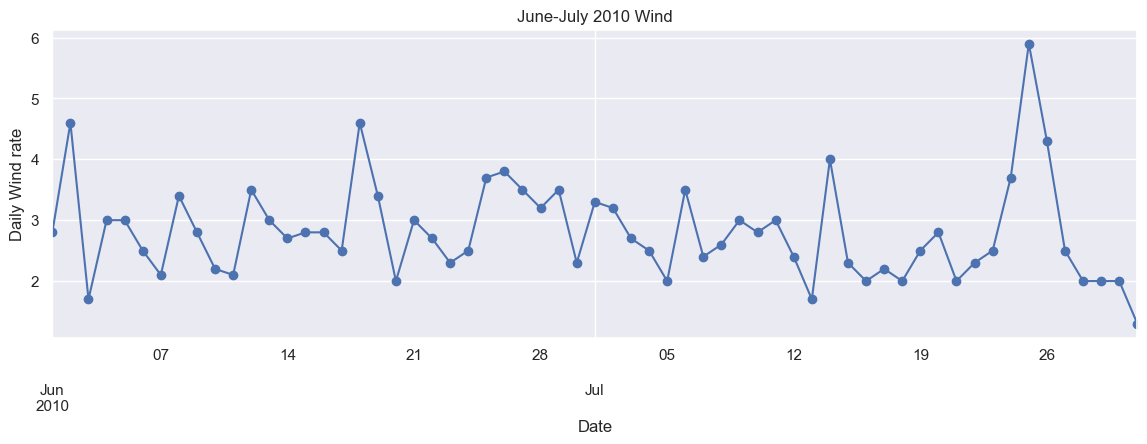

In [43]:
ax = dfm.loc['2010-06':'2010-07', 'Wind'].plot(marker ='o',linestyle='-')
ax.set_title('June-July 2010 Wind')
ax.set_ylabel('Daily Wind rate');

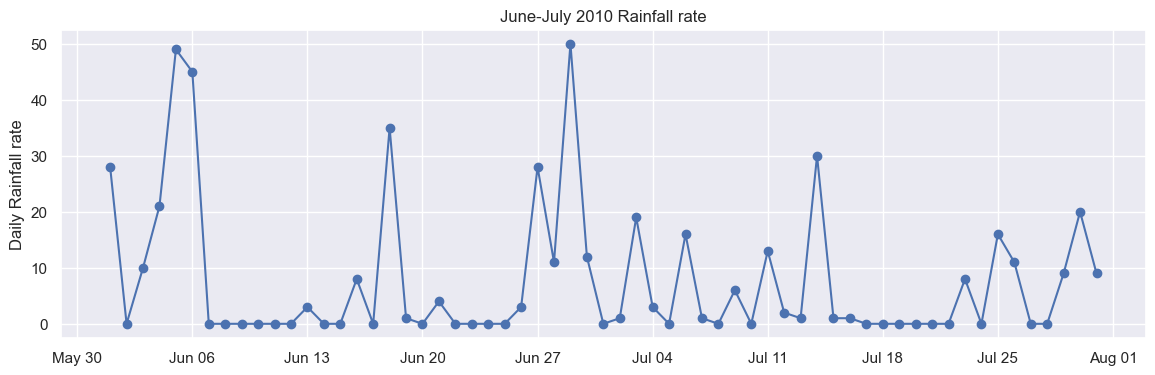

In [44]:
fig,ax = plt.subplots()
ax.plot(dfm.loc['2010-06':'2010-07', 'Rain'],marker ='o',linestyle='-')
ax.set_ylabel('Daily Rainfall rate')
ax.set_title('June-July 2010 Rainfall rate')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [45]:
dfm.dtypes

Year              int64
Month             int64
Rain            float64
Max_T.          float64
Min_T.          float64
Cloud           float64
Releted Hum.    float64
Sea Level P.    float64
Wind            float64
dtype: object

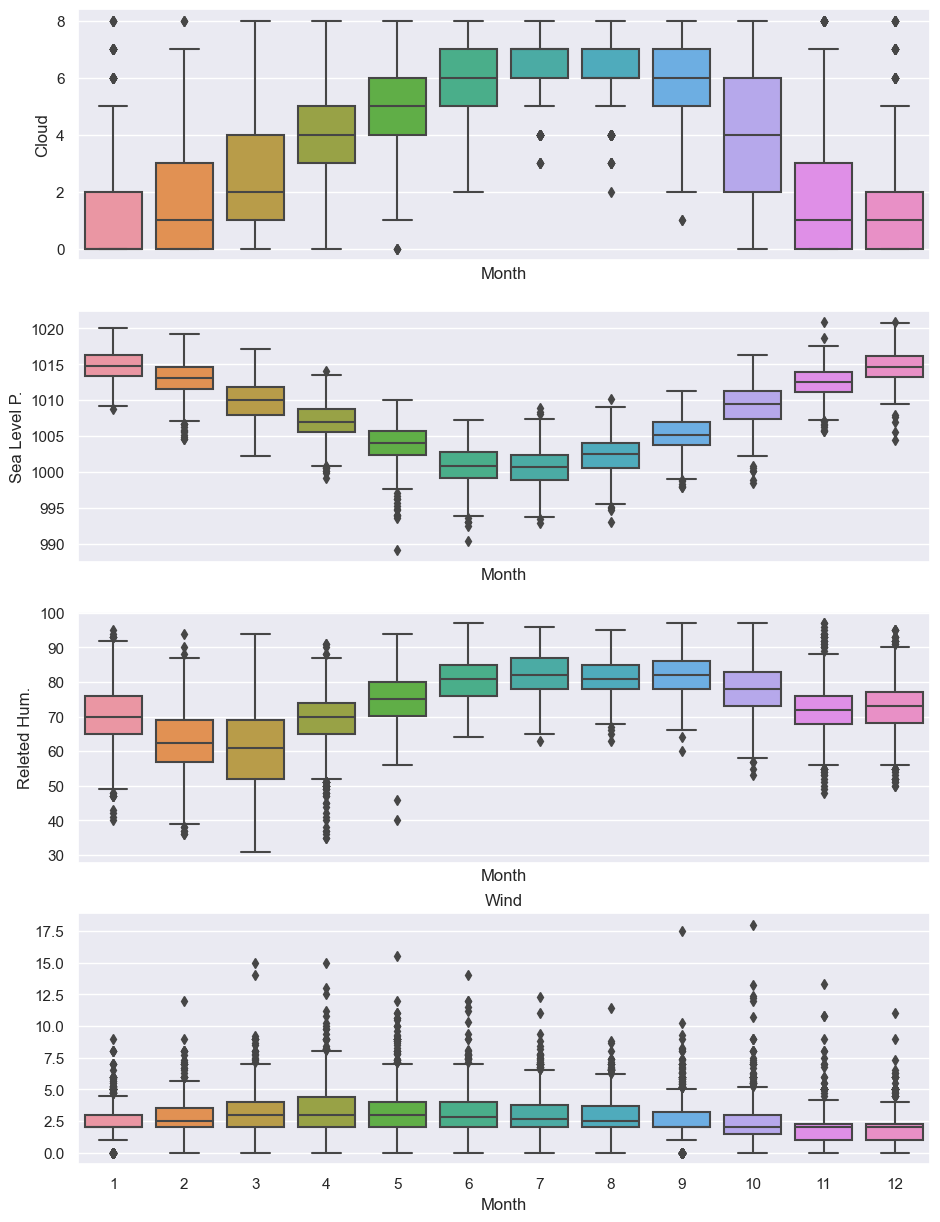

In [46]:
fig, axes = plt.subplots(4,1, figsize= (11,15),sharex=True)
for name, ax in zip(['Cloud','Sea Level P.','Releted Hum.','Wind'],axes):
    sns.boxplot(data=dfm, x='Month', y=name, ax=ax)
ax.set_ylabel('')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottm subplot
if ax != axes[-1]:
    ax.set_xlabel('')

### These box plots confirm that
1.There are less cloud in winter and much cloud in summer
2.The Sea Level P. rises high in winter and lows in summer
3.Releted Hum. stays average in winter and rises in summer
4.Wind stays average through out the year though rises in summer

In [47]:
data_columns = ['Rain' ,'Max_T.','Min_T.','Cloud','Releted Hum.','Sea Level P.','Wind']
dfm_weekly_mean = dfm[data_columns].resample('W').mean()

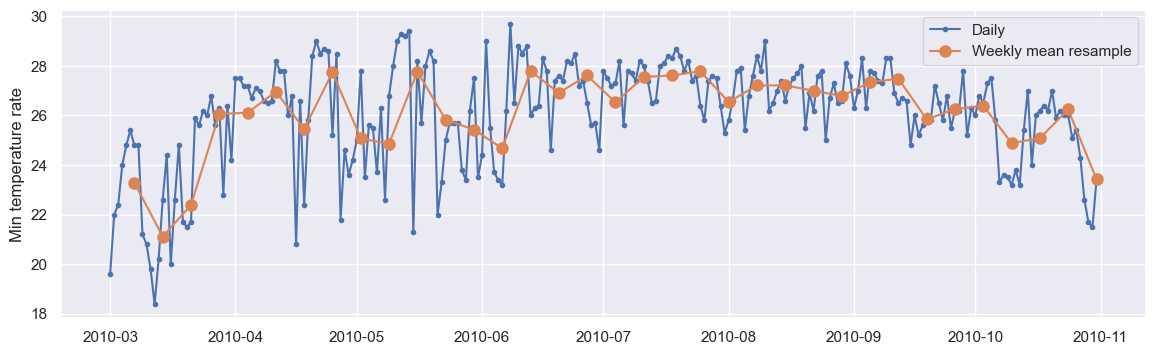

In [48]:
#Start and end of the date range to extract
start, end ='2010-03','2010-10'
#Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(dfm.loc[start:end,'Min_T.'],marker='.',linestyle='-',label='Daily')
ax.plot(dfm_weekly_mean.loc[start:end,'Min_T.'],marker='o',markersize=8,
       linestyle='-',label='Weekly mean resample')
ax.set_ylabel('Min temperature rate')
ax.legend()

### shows the daily and weekly resampled rainfall for '2010-03','2010-10' time

In [49]:
# Compute the monthly sums
dfm_monthly = dfm[data_columns].resample('M').sum(min_count=28)
dfm_monthly.head(3)

,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,
1988-01-31,0.0,842.6,421.6,32.0,2197.0,31452.2,59.0
1988-02-29,44.0,873.2,473.7,51.0,1953.0,29357.9,65.3
1988-03-31,74.0,1010.5,640.9,82.0,2127.0,31265.3,106.7


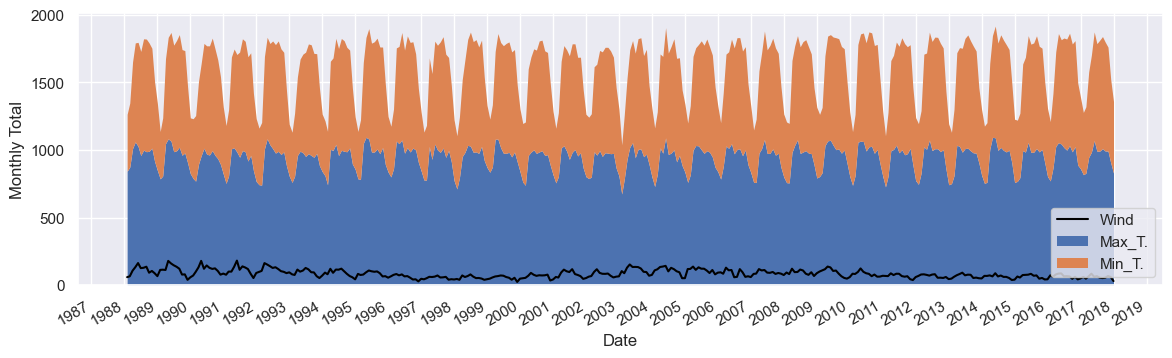

In [50]:
fig, ax = plt.subplots()
ax.plot(dfm_monthly['Wind'], color='black', label='Wind')
dfm_monthly[['Max_T.', 'Min_T.']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total');

We can clearly see that Max Tem. ,Min tem. and wind fairly stable over time 

<AxesSubplot:xlabel='Cloud', ylabel='count'>

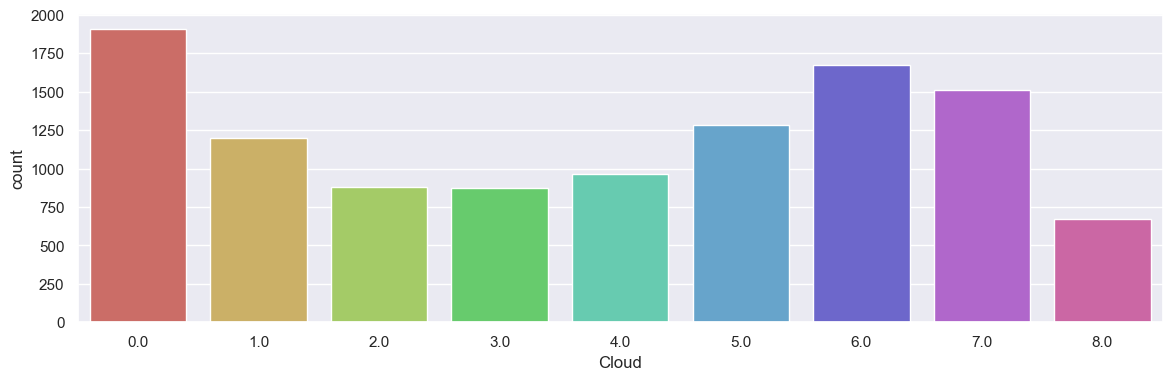

In [51]:
##Making sure cloud is a binary variable 
sns.countplot(x='Cloud',data=dfm,palette='hls')

<AxesSubplot:xlabel='Max_T.', ylabel='count'>

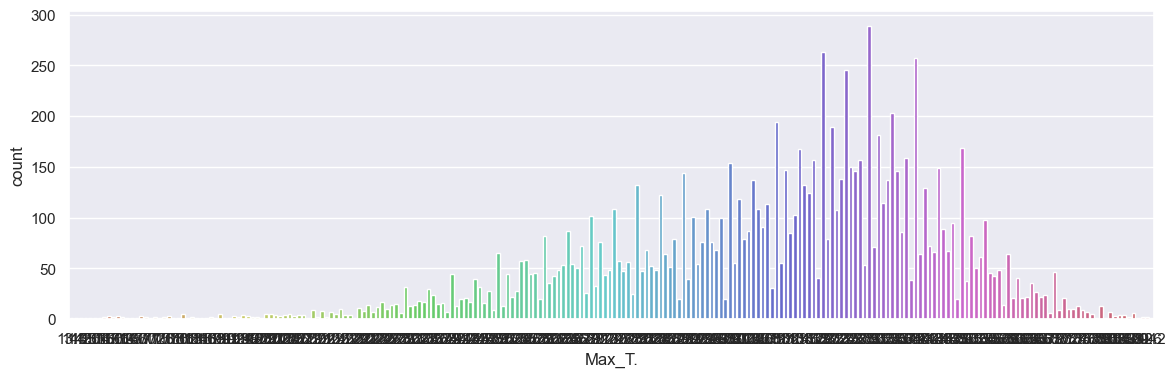

In [52]:
sns.countplot(x='Max_T.',data=dfm,palette='hls')

In [53]:
dfm.isnull().sum()

Year            0
Month           0
Rain            0
Max_T.          0
Min_T.          0
Cloud           0
Releted Hum.    0
Sea Level P.    0
Wind            1
dtype: int64

In [54]:
round(100*(df.isnull().sum()/len(df.index)),2) #This shows the percentage of missing value per column and per day

Year            0.0
Month           0.0
Day             0.0
Rain            0.0
Max_T.          0.0
Min_T.          0.0
Cloud           0.0
Releted Hum.    0.0
Sea Level P.    0.0
Wind            0.0
dtype: float64

In [55]:
## Reseting indexing
dfm.reset_index(drop=True,inplace=True)
dfm

,Year,Month,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,1988,1,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1,1989,1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
2,1990,1,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
3,1991,1,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
4,1992,1,0.0,20.5,12.8,4.0,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...
10953,2013,12,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
10954,2014,12,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
10955,2015,12,0.0,26.4,15.5,2.0,73.0,1017.5,0.0
10956,2016,12,0.0,26.2,15.0,1.0,80.0,1014.6,0.0


## THE dataframe don't have any missing value

In [56]:
##Dropping usless columns
data=dfm.drop(['Year','Month'],1)
data.head()

,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
2,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
3,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
4,0.0,20.5,12.8,4.0,75.0,1019.0,2.0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10958 entries, 0 to 10957
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rain          10958 non-null  float64
 1   Max_T.        10958 non-null  float64
 2   Min_T.        10958 non-null  float64
 3   Cloud         10958 non-null  float64
 4   Releted Hum.  10958 non-null  float64
 5   Sea Level P.  10958 non-null  float64
 6   Wind          10957 non-null  float64
dtypes: float64(7)
memory usage: 599.4 KB


In [58]:
data["Wind"].fillna( method ='ffill', limit = 1, inplace = True) 

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10958 entries, 0 to 10957
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rain          10958 non-null  float64
 1   Max_T.        10958 non-null  float64
 2   Min_T.        10958 non-null  float64
 3   Cloud         10958 non-null  float64
 4   Releted Hum.  10958 non-null  float64
 5   Sea Level P.  10958 non-null  float64
 6   Wind          10958 non-null  float64
dtypes: float64(7)
memory usage: 599.4 KB


# LSTM Algorithm

import keras

from numpy import loadtxt 
import sys
from scipy.stats import randint
from sklearn.metrics import mean_squared_error,r2_score
## Deep-learing:

from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from tensorflow.keras.layers import LSTM

from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
from sklearn.metrics import confusion_matrix

### split into train and test sets
X=data.iloc[:,1:7]
y=data.iloc[:,0]
### split into input and outputs
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = .3, random_state=25)
### reshape input to be 3D [samples, timesteps, features]
train_X = train_X.values.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.values.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
### We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
### fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)
### summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### make a prediction
yhat = model.predict(test_X, verbose=0)
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

### LSTM gave RMSE for rain is :13.366

# Applying KNN

In [60]:
X=data.iloc[:,1:7] 
y=data.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state=25)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
### training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
### for k or n_neighbors=5 accuracy 0.3515****
### accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
### creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))

Accuracy: 0.6602798053527981


### KNN gave accuracy for rain :0.6602798053527981

# Decision Tree

In [63]:
### training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
### creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.6730535279805353


### Decision Tree gave accuracy for rain: 0.6730535279805353

# SVM

In [64]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions))

Accuracy: 0.6727493917274939


### SVM gave accuracy for rain:0.6727493917274939

# Logistic Regration

<AxesSubplot:>

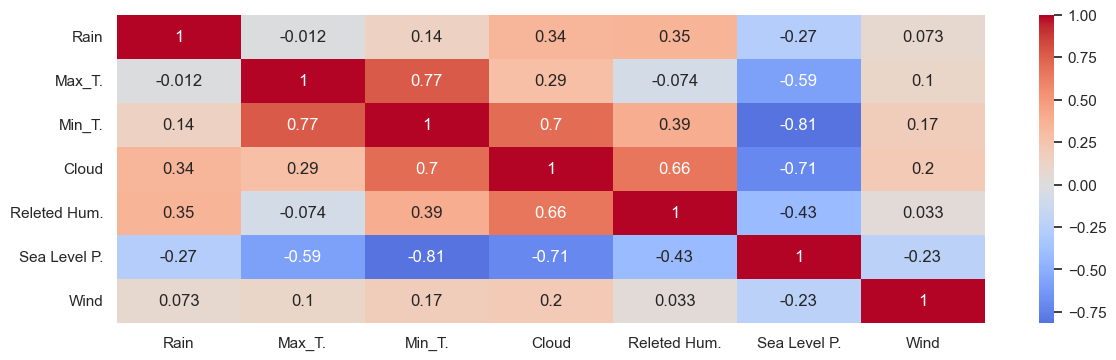

In [65]:
sns.heatmap(data.corr(),center=0,cmap='coolwarm',annot = True)

In [66]:
LogReg = LogisticRegression(max_iter=10958 ,multi_class='multinomial')
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred ,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81      2213
        18.0       0.00      0.00      0.00        23
        28.0       0.00      0.00      0.00        14
        36.0       0.08      0.14      0.10         7
        63.0       0.00      0.00      0.00         3
        76.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         0
       101.0       0.00      0.00      0.00         1

   micro avg       0.67      0.98      0.80      2262
   macro avg       0.09      0.14      0.11      2262
weighted avg       0.67      0.98      0.79      2262



## Logistic Regration gave accuracy for rain:0.67